# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [241]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [268]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [269]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Create units for temperaure
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # testing purposes
#     if i == 3:
#         print(city_weather)
#         break
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | kjopsvik
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | acapulco
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | kavieng
Processing Record 12 of Set 1 | hami
Processing Record 13 of Set 1 | dalnegorsk
Processing Record 14 of Set 1 | talah
City not found. Skipping...
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | honningsvag
Processing Record 19 of Set 1 | sorvag
City not found. Skipping...
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | tenenkou
Processing Record 22 of Set 1 | moron
P

Processing Record 36 of Set 4 | toliary
City not found. Skipping...
Processing Record 37 of Set 4 | trelew
Processing Record 38 of Set 4 | syasstroy
Processing Record 39 of Set 4 | chumikan
Processing Record 40 of Set 4 | springdale
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | albion
Processing Record 43 of Set 4 | zlobin
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | lavrentiya
Processing Record 46 of Set 4 | los llanos de aridane
Processing Record 47 of Set 4 | ucluelet
Processing Record 48 of Set 4 | arraial do cabo
Processing Record 49 of Set 4 | amahai
Processing Record 0 of Set 5 | santa fe
Processing Record 1 of Set 5 | guilin
Processing Record 2 of Set 5 | lodja
Processing Record 3 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 5 | cartagena
Processing Record 5 of Set 5 | tessalit
Processing Record 6 of Set 5 | jiddah
City not found. Skipping...
Processi

Processing Record 26 of Set 8 | san cristobal
Processing Record 27 of Set 8 | saldanha
Processing Record 28 of Set 8 | laguna
Processing Record 29 of Set 8 | boende
Processing Record 30 of Set 8 | cockburn town
Processing Record 31 of Set 8 | souris
Processing Record 32 of Set 8 | namatanai
Processing Record 33 of Set 8 | antofagasta
Processing Record 34 of Set 8 | damietta
Processing Record 35 of Set 8 | alotau
City not found. Skipping...
Processing Record 36 of Set 8 | hamilton
Processing Record 37 of Set 8 | santiago del estero
Processing Record 38 of Set 8 | sept-iles
Processing Record 39 of Set 8 | christchurch
Processing Record 40 of Set 8 | labuhan
Processing Record 41 of Set 8 | ixtapa
Processing Record 42 of Set 8 | senno
Processing Record 43 of Set 8 | adelaide
Processing Record 44 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 45 of Set 8 | jijiang
Processing Record 46 of Set 8 | hihifo
City not found. Skipping...
Processing Record 47 of Set 8 | zhigans

Processing Record 11 of Set 12 | tayibe
City not found. Skipping...
Processing Record 12 of Set 12 | kloulklubed
Processing Record 13 of Set 12 | goderich
Processing Record 14 of Set 12 | crawfordsville
Processing Record 15 of Set 12 | yorosso
Processing Record 16 of Set 12 | sainte-marie
Processing Record 17 of Set 12 | gweta
Processing Record 18 of Set 12 | madang
Processing Record 19 of Set 12 | brae
Processing Record 20 of Set 12 | mangrol
Processing Record 21 of Set 12 | vila nova de milfontes
Processing Record 22 of Set 12 | george
Processing Record 23 of Set 12 | iwanai
Processing Record 24 of Set 12 | riyadh
Processing Record 25 of Set 12 | arona
Processing Record 26 of Set 12 | kathu
Processing Record 27 of Set 12 | vanavara
Processing Record 28 of Set 12 | birao
Processing Record 29 of Set 12 | kungurtug
Processing Record 30 of Set 12 | lerwick
Processing Record 31 of Set 12 | walvis bay
Processing Record 32 of Set 12 | myaundzha
Processing Record 33 of Set 12 | mokobeng
Proc

In [270]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [271]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,26.07,76,19,6.78,PF,1675817481
1,upernavik,72.7868,-56.1549,-29.63,97,60,1.47,GL,1675817481
2,busselton,-33.6500,115.3333,22.42,57,0,3.71,AU,1675817482
3,kjopsvik,68.0970,16.3742,2.93,85,100,6.46,NO,1675817483
4,geraldton,-28.7667,114.6000,24.23,64,0,6.17,AU,1675817472


In [272]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [273]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,26.07,76,19,6.78,PF,1675817481
1,upernavik,72.7868,-56.1549,-29.63,97,60,1.47,GL,1675817481
2,busselton,-33.6500,115.3333,22.42,57,0,3.71,AU,1675817482
3,kjopsvik,68.0970,16.3742,2.93,85,100,6.46,NO,1675817483
4,geraldton,-28.7667,114.6000,24.23,64,0,6.17,AU,1675817472


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

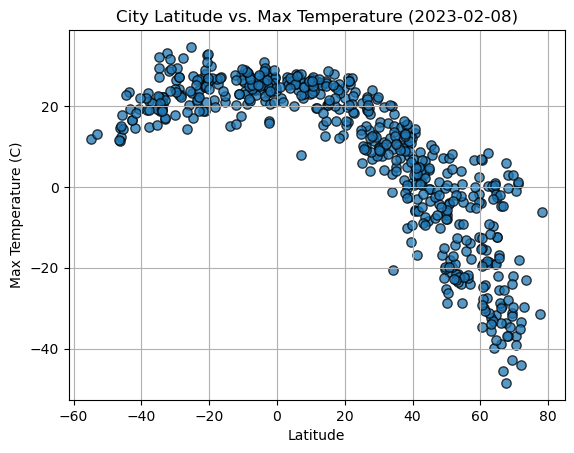

In [274]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot("Lat", "Max Temp", kind = "scatter", grid = True, title = "City Latitude vs. Max Temperature (2023-02-08)",
                 xlabel= "Latitude", ylabel = "Max Temperature (C)", s = 45, edgecolor = "black", linewidth = 1, 
                  alpha = 0.75)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

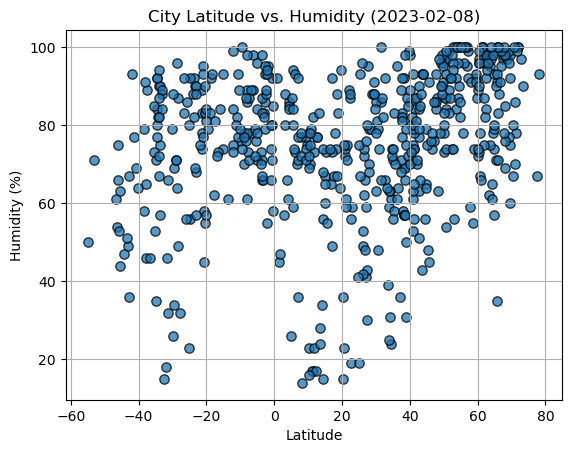

In [275]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot("Lat", "Humidity", kind = "scatter", grid = True, title = "City Latitude vs. Humidity (2023-02-08)",
                 xlabel= "Latitude", ylabel = "Humidity (%)", s = 45, edgecolor = "black", linewidth = 1, 
                  alpha = 0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

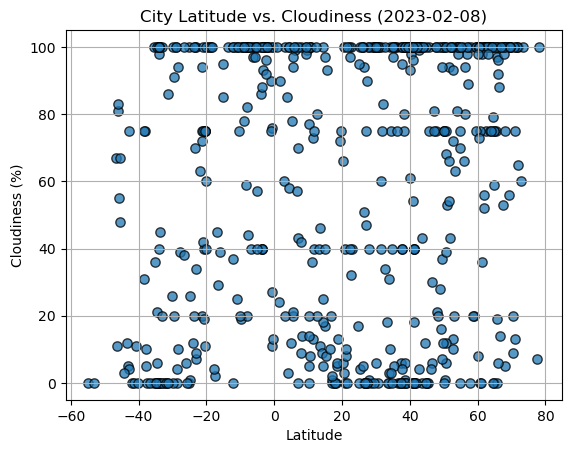

In [276]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot("Lat", "Cloudiness", kind = "scatter", grid = True, title = "City Latitude vs. Cloudiness (2023-02-08)",
                 xlabel= "Latitude", ylabel = "Cloudiness (%)", s = 45, edgecolor = "black", linewidth = 1, 
                  alpha = 0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

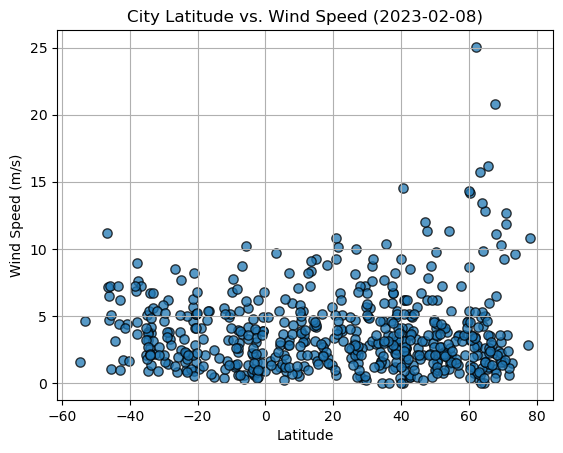

In [277]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot("Lat", "Wind Speed", kind = "scatter", grid = True, title = "City Latitude vs. Wind Speed (2023-02-08)",
                 xlabel= "Latitude", ylabel = "Wind Speed (m/s)", s = 45, edgecolor = "black", linewidth = 1, 
                  alpha = 0.75)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [278]:
# Define a function to create Linear Regression plots
def lin_regress_plot(df, x, y, xlabel, ylabel):
    # linear Regression Equation
    d_slope, d_int, d_r, d_p, d_std_err = linregress(df[x], df[y])
    print(f"The r-value is: {d_r}")
    
    # plot figure and labels
    plt.scatter(df[x],df[y])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    d_line = d_slope * df[x] + d_int
    plt.plot(df[x], d_line, color = 'red')
    plt.text(round(df[x].min(),2), round(df[y].min(),2), f'$y ={round(d_slope, 2)}x + {round(d_int, 2)} $',
    color='red', fontsize=15)

    plt.show()

In [279]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.query("Lat >= 0")

# Display sample data
print(len(northern_hemi_df))
northern_hemi_df.head()

391


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,upernavik,72.7868,-56.1549,-29.63,97,60,1.47,GL,1675817481
3,kjopsvik,68.0970,16.3742,2.93,85,100,6.46,NO,1675817483
6,acapulco,16.8634,-99.8901,27.90,65,20,5.14,MX,1675817398
11,hami,42.8000,93.4500,0.40,63,100,0.43,CN,1675817494
12,dalnegorsk,44.5604,135.5701,-8.31,56,12,3.28,RU,1675817494


In [280]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.query("Lat < 0")
print(len(southern_hemi_df))

# Display sample data
southern_hemi_df.head()

178


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,26.07,76,19,6.78,PF,1675817481
2,busselton,-33.6500,115.3333,22.42,57,0,3.71,AU,1675817482
4,geraldton,-28.7667,114.6000,24.23,64,0,6.17,AU,1675817472
5,ushuaia,-54.8000,-68.3000,11.81,50,0,1.54,AR,1675817486
7,isangel,-19.5500,169.2667,30.06,79,100,1.03,VU,1675817489


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8555518653387205


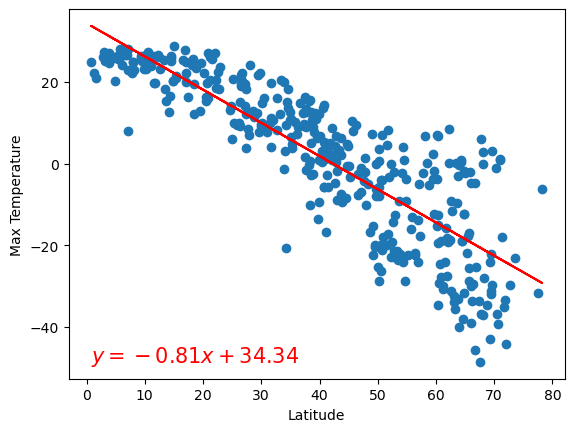

In [281]:
# Linear regression on Northern Hemisphere
lin_regress_plot(northern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temperature")

The r-value is: 0.4607527913563266


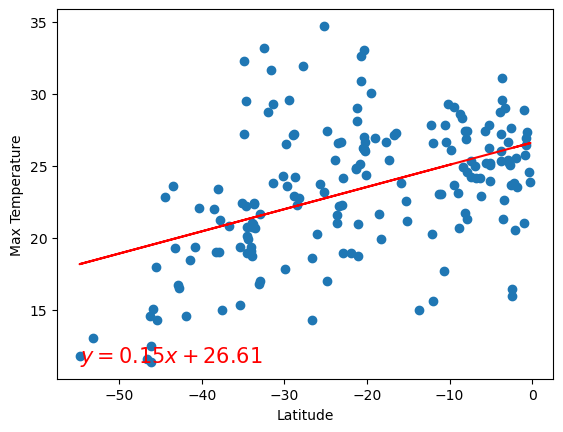

In [282]:
# Linear regression on Southern Hemisphere
lin_regress_plot(southern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temperature")

**Discussion about the linear relationship:** As we can see in both linear regression graphs above, the closer the city is to the equator(i.e., latitude =0), the warmer it typically is. 

In the Northern Hemisphere graph, we see that the equation of a line has a negative slope. As the latitude increases, the Maximum temperature decreases, which aligns with our initial assumption. We can see that the data points of the Northern Hemisphere's graph are close to each other and rapidly decrease in temperature as the latitude increases. It could be because it is currently winter( February 7th) in the Northern Hemisphere, so it will be colder.

In the Southern Hemisphere graph, we see that the equation of a line has a positive slope. As the latitude increase, the Maximum temperature increases, which aligns with our initial assumption. We can see that the data points of the Southern Hemisphere's graph are more spread out and slowly increasing in temperature as the latitude increases. It could be because it is currently summer (February 7th) in the Southern Hemisphere, and temperatures will be warmer.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.45080037190375266


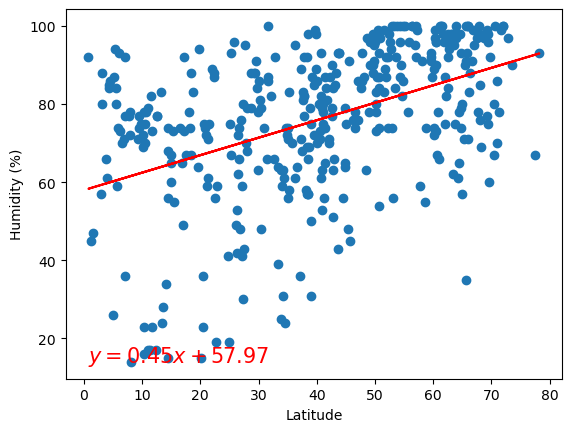

In [283]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df, "Lat", "Humidity", "Latitude", "Humidity (%)")

The r-value is: 0.36344090424441866


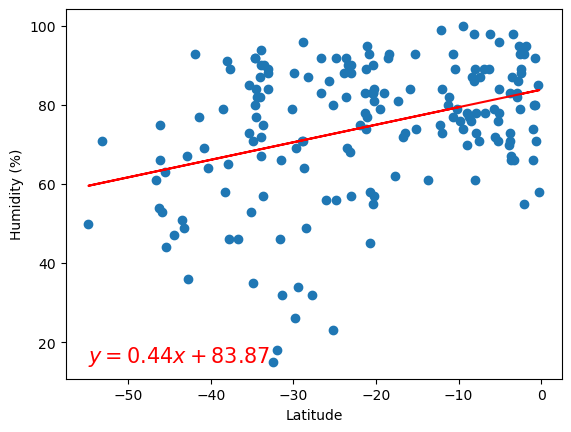

In [284]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df, "Lat", "Humidity", "Latitude", "Humidity (%)")

**Discussion about the linear relationship:** The original assumption is that there will be more humidity in cities closer to the equator((i.e., latitude =0). This region receives, on average, the most insolation, which causes a relatively high amount of evaporation and higher water vapor content in the air.

In the Northern Hemisphere graph, we see that the equation of a line has a positive slope which contradicts our original guess. More dataset analysis needs to be conducted to understand why there is more humidity in the higher latitudes.

In the Southern Hemisphere graph, we see that the equation of a line has a positive slope. As the latitude increase, the humidity should also increase, which aligns with our initial assumption. Since it is currently summer in the Southern Hemisphere, most cities have a higher percentage of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2292006457922802


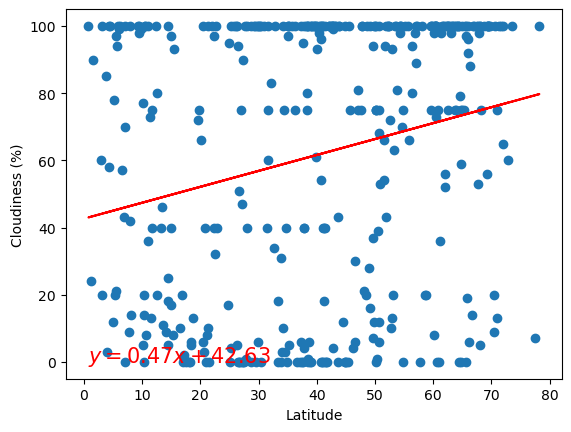

In [285]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df, "Lat", "Cloudiness", "Latitude", "Cloudiness (%)")

The r-value is: 0.4657041906208423


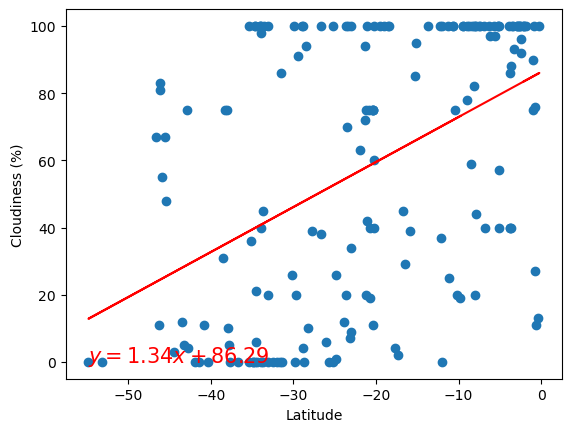

In [286]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df, "Lat", "Cloudiness", "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:** 

In the Northern Hemisphere graph, we see that the equation of a line has a slightly positive slope, and the data points are mostly spread out to both ends. There is no linear relationship between temperature and latitude. 

In the Southern Hemisphere graph, we see that the equation of a line has a positive slope, and the data points are spread out, but the cloudiness percentage is significantly higher on higher latitudes. There might be a linear relationship between temperature and altitude, but more dataset analysis needs to be performed to prove this assumption.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06211578409160613


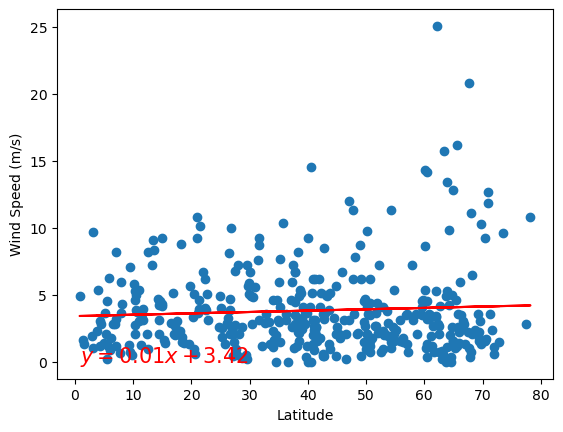

In [287]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df, "Lat", "Wind Speed", "Latitude", "Wind Speed (m/s)")

The r-value is: -0.23477454897531777


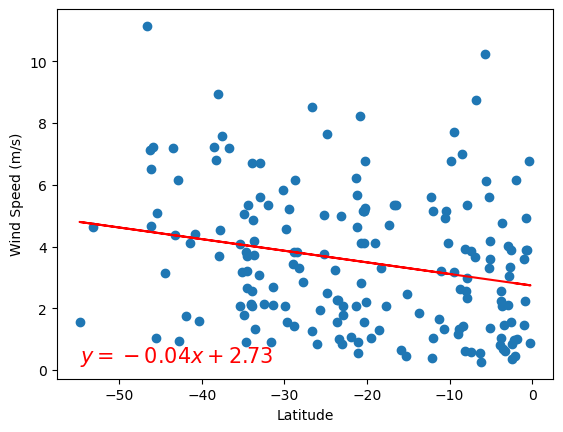

In [288]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df, "Lat", "Wind Speed", "Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** 
In the Northern Hemisphere graph, we see that the equation of a line has a slightly positive slope, and the data points are on one end of the graph. As a result, there is no linear relationship between temperature and latitude. 

In the Southern Hemisphere graph, we see that the equation of a line has a slight negative slope, and the data points are on the bottom half of the graph. As a result, there is no linear relationship between temperature and latitude. 